# Necessary Libraries

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sns
import time

# Dataset Loading

In [5]:
# Load the dataset 
dataset_path = "../Data/Android_Malgenome_Dataset/malgenome-215-dataset-1260malware-2539-benign.csv"
data = pd.read_csv(dataset_path)

data["class"] = data["class"].map({'S': 1, 'B': 0}).astype(int)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [6]:
print(data.shape)
print(X.shape)
print(y.shape)

(3799, 216)
(3799, 215)
(3799,)


# Declaring feature sets

In [7]:
#Feature sets

FeatureSet_4 = [
    'READ_CONTACTS',
    'WAKE_LOCK', 'READ_SMS', 'VIBRATE'
]

FeatureSet_8 = [
    'READ_CONTACTS',
    'WAKE_LOCK', 'READ_SMS','VIBRATE',
     'Ljava.lang.Class.forName',
    'System.loadLibrary',
    'DexClassLoader',
    'PathClassLoader'
]

FeatureSet_10 = [
    'GET_ACCOUNTS', 'BROADCAST_STICKY',
    'ACCESS_NETWORK_STATE', 'READ_CONTACTS',
    'CHANGE_NETWORK_STATE', 'BLUETOOTH',
    'WAKE_LOCK', 'READ_SMS',
    'ACCESS_COARSE_LOCATION', 'VIBRATE'
]

FeatureSet_14 = [
    'GET_ACCOUNTS', 'BROADCAST_STICKY',
    'ACCESS_NETWORK_STATE', 'READ_CONTACTS',
    'CHANGE_NETWORK_STATE', 'BLUETOOTH',
    'WAKE_LOCK', 'READ_SMS',
    'ACCESS_COARSE_LOCATION', 'VIBRATE',
     'Ljava.lang.Class.forName',
    'System.loadLibrary',
    'DexClassLoader',
    'PathClassLoader'
]

FeatureSet_20 = [
    'GET_ACCOUNTS', 'BROADCAST_STICKY',
    'ACCESS_NETWORK_STATE', 'READ_CONTACTS',
    'CHANGE_NETWORK_STATE', 'BLUETOOTH',
    'WAKE_LOCK', 'READ_SMS',
    'ACCESS_COARSE_LOCATION', 'VIBRATE',
     'Ljava.lang.Class.forName',
    'System.loadLibrary',
    'DexClassLoader',
    'PathClassLoader',
    'Runtime.exec', 'transact', 'bindService', 'android.os.Binder', 'attachInterface','Ljava.lang.Class.getMethods']

FeatureSet_26 = ['Runtime.exec', 'HttpGet.init', 'attachInterface', 
               'createSubprocess', 'Ljavax.crypto.Cipher', 'Ljava.lang.Class.getCanonicalName', 
               'Ljava.lang.Class.getMethods', 'Ljava.lang.Class.getDeclaredField', 'Ljava.lang.Class.getResource', 
               'GET_ACCOUNTS', 'BROADCAST_STICKY', 'ACCESS_NETWORK_STATE', 'READ_CONTACTS', 'CHANGE_NETWORK_STATE', 
               'BLUETOOTH', 'WAKE_LOCK', 'READ_SMS', 'ACCESS_COARSE_LOCATION', 'VIBRATE', 'Ljava.lang.Class.forName', 
               'System.loadLibrary', 'DexClassLoader', 'PathClassLoader', 'transact', 'bindService', 'android.os.Binder']

FeatureSet_32 = ['Runtime.exec', 'HttpGet.init', 'attachInterface', 
                 'createSubprocess', 'Ljavax.crypto.Cipher', 'Ljava.lang.Class.getCanonicalName', 
                 'Ljava.lang.Class.getMethods', 'Ljava.lang.Class.getDeclaredField', 'Ljava.lang.Class.getResource', 
                 'GET_ACCOUNTS', 'BROADCAST_STICKY', 'ACCESS_NETWORK_STATE', 'READ_CONTACTS', 'CHANGE_NETWORK_STATE', 
                 'BLUETOOTH', 'WAKE_LOCK', 'READ_SMS', 'ACCESS_COARSE_LOCATION', 'VIBRATE', 'Ljava.lang.Class.forName', 
                 'System.loadLibrary', 'DexClassLoader', 'PathClassLoader', 'transact', 'bindService', 'android.os.Binder', 
                 'ClassLoader', 'Runtime.getRuntime', 'Ljava.lang.Class.getMethod', 'Ljava.lang.Class.cast', 'HttpPost.init', 
                 'ProcessBuilder']

FeatureSet_215 = X.columns.tolist()

# Training and testing the model

In [8]:
# function to train and return
def train_and_evaluate(X, y):
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024, stratify=y)

    clf = RandomForestClassifier(random_state=2024)

    cv = StratifiedKFold(n_splits=50, shuffle=True, random_state=2024)
    cross_val_f1_scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='f1_macro')
    cross_val_f1_mean = np.mean(cross_val_f1_scores)

    start_train_time = time.time()
    clf.fit(X_train, y_train)
    end_train_time = time.time() 
    train_time = end_train_time - start_train_time 

    start_test_time = time.time()
    y_pred = clf.predict(X_test)
    end_test_time = time.time()
    test_time = end_test_time - start_test_time

    accuracy_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred, average='macro')
    recall_test = recall_score(y_test, y_pred, average='macro')
    f1_test = f1_score(y_test, y_pred, average='macro')

    metrics_df = pd.DataFrame([{
        "Accuracy (%)": round(accuracy_test * 100, 2),
        "Precision (%)": round(precision_test * 100, 2),
        "Recall (%)": round(recall_test * 100, 2),
        "F1-Score (%)": round(f1_test * 100, 2),
        "F1-Score (Validation) (%)": round(cross_val_f1_mean * 100, 2),
        "Training Time (s)": round(train_time, 5),
        "Testing Time (s)": round(test_time, 5)
    }])

    cm = confusion_matrix(y_test, y_pred)

    return y_test, y_pred, X_test, metrics_df, cm


# Model fitting for all feature sets

In [9]:
y_test_4, y_pred_4, X_test_4, metrics_df_4, cm_4 = train_and_evaluate(X[FeatureSet_4],y)
y_test_8, y_pred_8, X_test_8, metrics_df_8, cm_8 = train_and_evaluate(X[FeatureSet_8],y)
y_test_10, y_pred_10, X_test_10, metrics_df_10, cm_10 = train_and_evaluate(X[FeatureSet_10],y)
y_test_14, y_pred_14, X_test_14, metrics_df_14, cm_14 = train_and_evaluate(X[FeatureSet_14],y)
y_test_20, y_pred_20, X_test_20, metrics_df_20, cm_20 = train_and_evaluate(X[FeatureSet_20],y)
y_test_26, y_pred_26, X_test_26, metrics_df_26, cm_26 = train_and_evaluate(X[FeatureSet_26],y)
y_test_32, y_pred_32, X_test_32, metrics_df_32, cm_32 = train_and_evaluate(X[FeatureSet_32],y)
y_test_215, y_pred_215, X_test_215, metrics_df_215, cm_215 = train_and_evaluate(X[FeatureSet_215],y)

## Metrics for all feature sets

In [10]:
metrics_dfs = [
    (metrics_df_4, len(FeatureSet_4)),
    (metrics_df_8, len(FeatureSet_8)),
    (metrics_df_10, len(FeatureSet_10)),
    (metrics_df_14, len(FeatureSet_14)),
    (metrics_df_20, len(FeatureSet_20)),
    (metrics_df_26, len(FeatureSet_26)),
    (metrics_df_32, len(FeatureSet_32)),
    (metrics_df_215, len(FeatureSet_215)),
]

baseline_f1_score = metrics_df_215['F1-Score (%)']

metrics_with_features = []
for df, num_features in metrics_dfs:
  
    df['Num_features'] = num_features
    
    f1_score_featureSet = df['F1-Score (%)'] 
    percentage_reduction = round(((baseline_f1_score - f1_score_featureSet ) / baseline_f1_score) * 100, 2)
    df['F1_Score_Reduction (%)'] = percentage_reduction
    
    df = df[['Num_features', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)', 'F1-Score (Validation) (%)',
             'F1_Score_Reduction (%)', 'Training Time (s)', 'Testing Time (s)']]
    
    metrics_with_features.append(df)

merged_metrics_df = pd.concat(metrics_with_features, ignore_index=True)

merged_metrics_df.reset_index(drop=True, inplace=True)

merged_metrics_df


,Num_features,Accuracy (%),Precision (%),Recall (%),F1-Score (%),F1-Score (Validation) (%),F1_Score_Reduction (%),Training Time (s),Testing Time (s)
0,4,82.76,82.10,77.81,79.30,78.74,19.87,0.07562,0.00401
1,8,86.45,84.59,85.06,84.82,84.13,14.29,0.10500,0.00544
2,10,86.32,86.09,82.36,83.79,84.88,15.33,0.09317,0.00582
3,14,90.53,90.04,88.31,89.09,89.80,9.97,0.10428,0.00583
4,20,94.21,94.07,92.77,93.37,94.12,5.65,0.10803,0.00780
5,26,95.26,95.00,94.26,94.61,96.86,4.40,0.12162,0.00487
6,32,96.45,96.51,95.44,95.95,96.82,3.04,0.12108,0.00618
7,215,99.08,99.21,98.71,98.96,99.32,0.00,0.17723,0.00778


# Comparison of metric with variation of number of features

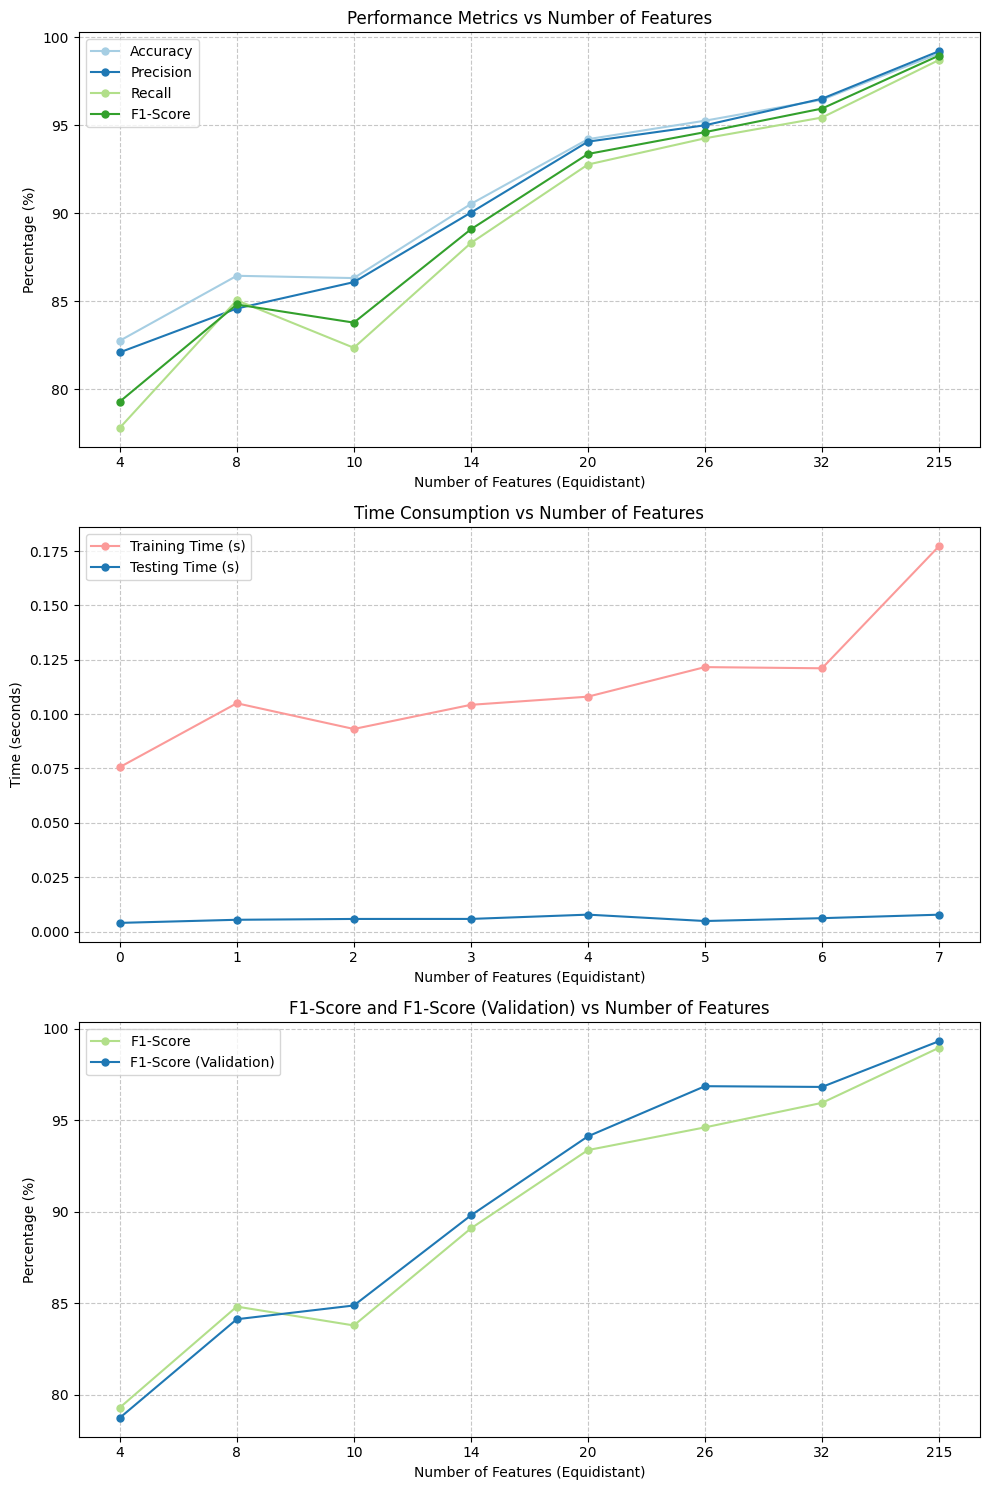

In [13]:
num_features = merged_metrics_df['Num_features']
accuracy = merged_metrics_df['Accuracy (%)']
precision = merged_metrics_df['Precision (%)']
recall = merged_metrics_df['Recall (%)']
f1 = merged_metrics_df['F1-Score (%)']
training_time = merged_metrics_df['Training Time (s)']
testing_time = merged_metrics_df['Testing Time (s)']
f1_validation = merged_metrics_df['F1-Score (Validation) (%)']

x_values = np.linspace(0, len(num_features) - 1, len(num_features))

cmap = plt.get_cmap('Paired')
colors = [cmap(i / 10) for i in range(5)] 

plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
plt.plot(x_values, accuracy, label='Accuracy', marker='o', color=colors[0], linestyle='-', markersize=5)
plt.plot(x_values, precision, label='Precision', marker='o', color=colors[1], linestyle='-', markersize=5)
plt.plot(x_values, recall, label='Recall', marker='o', color=colors[2], linestyle='-', markersize=5)
plt.plot(x_values, f1, label='F1-Score', marker='o', color=colors[3], linestyle='-', markersize=5)

plt.xlabel('Number of Features (Equidistant)')
plt.ylabel('Percentage (%)')
plt.title('Performance Metrics vs Number of Features')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7) 
plt.xticks(x_values, num_features)

plt.subplot(3, 1, 2)
plt.plot(x_values, training_time, label='Training Time (s)', marker='o', color=colors[4], linestyle='-', markersize=5)
plt.plot(x_values, testing_time, label='Testing Time (s)', marker='o', color=colors[1], linestyle='-', markersize=5)

plt.xlabel('Number of Features (Equidistant)')
plt.ylabel('Time (seconds)')
plt.title('Time Consumption vs Number of Features')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(3, 1, 3)
plt.plot(x_values, f1, label='F1-Score', marker='o', color=colors[2], linestyle='-', markersize=5)
plt.plot(x_values, f1_validation, label='F1-Score (Validation)', marker='o', color=colors[1], linestyle='-', markersize=5)

plt.xlabel('Number of Features (Equidistant)')
plt.ylabel('Percentage (%)')
plt.title('F1-Score and F1-Score (Validation) vs Number of Features')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines

plt.xticks(x_values, num_features)

plt.tight_layout()
plt.show()


## Plot of f1 score and % of reduction in f1-scores with variation in number of features

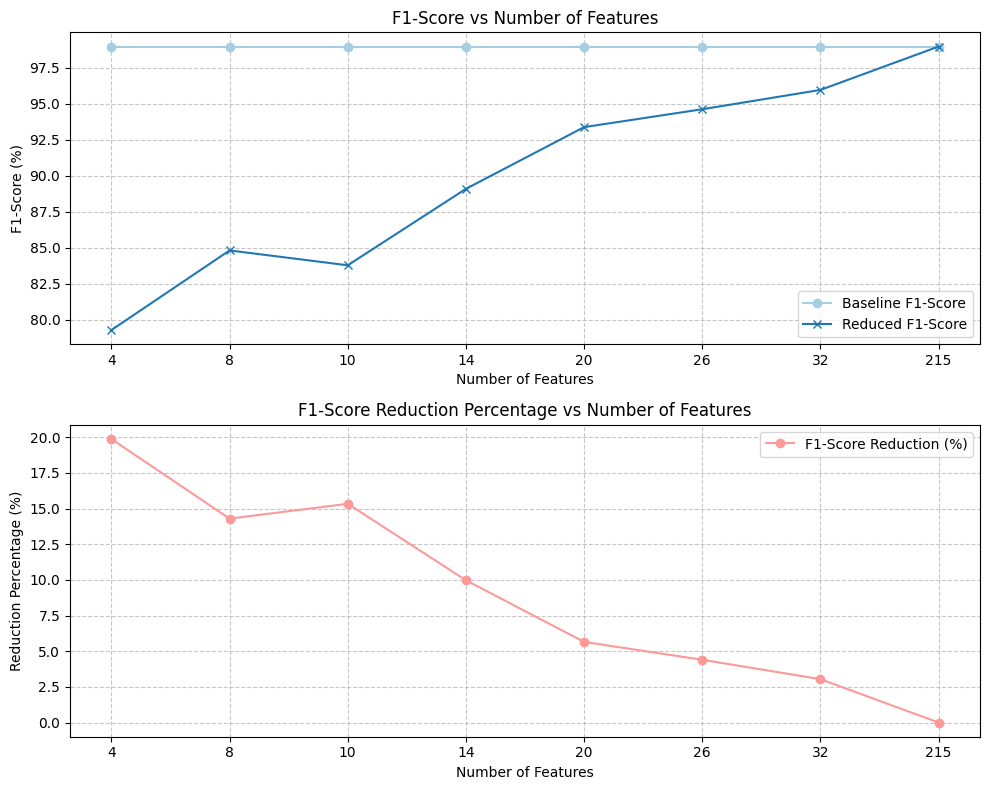

In [14]:
num_features_list = []
baseline_f1_scores = []
reduced_f1_scores = []
reduction_percentages = []

for df, num_features in metrics_dfs:
    f1_score_featureSet = df['F1-Score (%)'].iloc[0] 
    percentage_reduction = df['F1_Score_Reduction (%)'].iloc[0] 
    
    num_features_list.append(num_features)
    baseline_f1_scores.append(baseline_f1_score.iloc[0])  
    reduced_f1_scores.append(f1_score_featureSet)
    reduction_percentages.append(percentage_reduction)

cmap = plt.get_cmap('Paired')

x_values = np.linspace(0, len(num_features_list) - 1, len(num_features_list))

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

ax1.set_xlabel('Number of Features')
ax1.set_ylabel('F1-Score (%)')
ax1.plot(x_values, baseline_f1_scores, label='Baseline F1-Score', color=cmap(0), marker='o')
ax1.plot(x_values, reduced_f1_scores, label='Reduced F1-Score', color=cmap(1), marker='x')

ax1.set_xticks(x_values)
ax1.set_xticklabels(num_features_list)  

ax1.grid(True, linestyle='--', alpha=0.7)

ax1.legend(loc='lower right')

ax1.set_title('F1-Score vs Number of Features')

ax2.set_xlabel('Number of Features')
ax2.set_ylabel('Reduction Percentage (%)')
ax2.plot(x_values, reduction_percentages, label='F1-Score Reduction (%)', color=cmap(4), marker='o')

ax2.set_xticks(x_values)
ax2.set_xticklabels(num_features_list) 

ax2.grid(True, linestyle='--', alpha=0.7)

ax2.legend(loc='upper right')

ax2.set_title('F1-Score Reduction Percentage vs Number of Features')

plt.tight_layout()
plt.show()


## Plot of Confusion Matrixces for different number of features

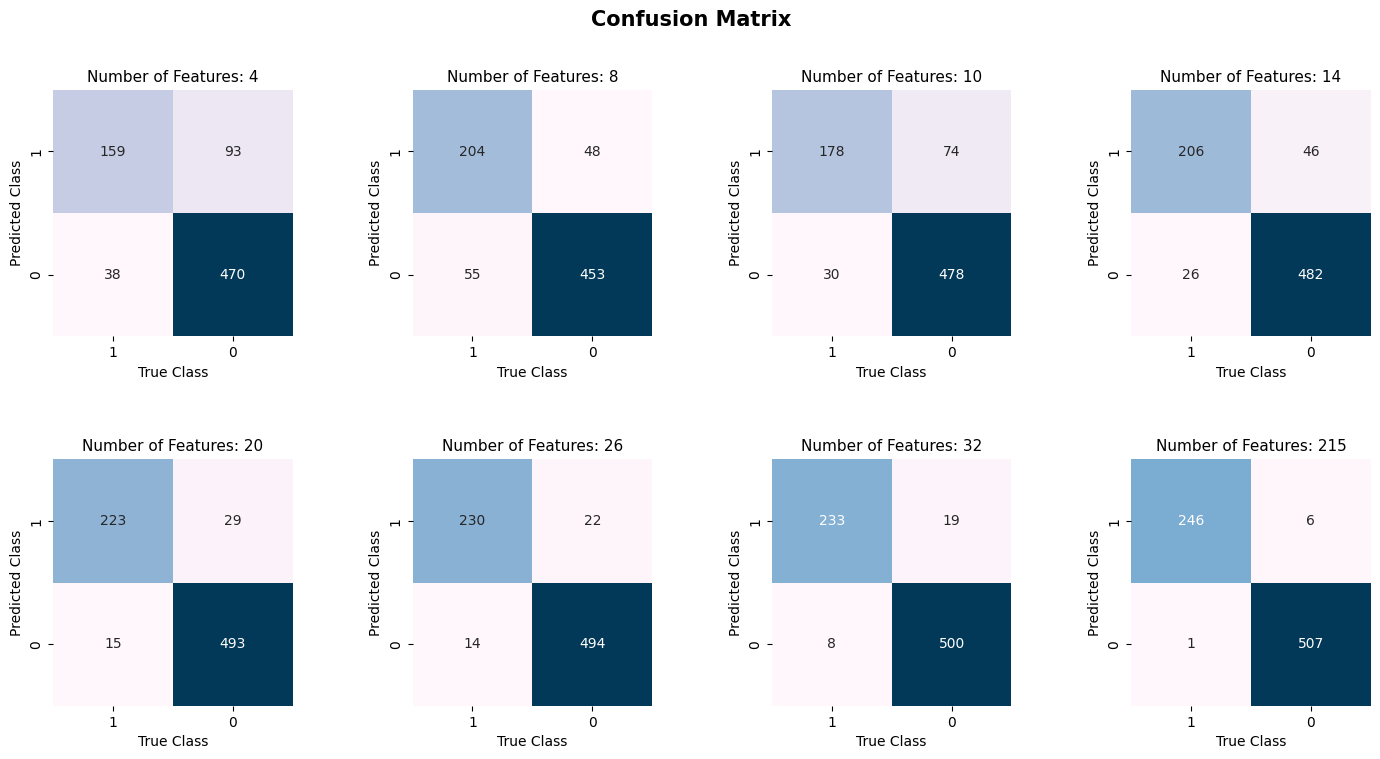

In [16]:

cm_list = [cm_4, cm_8, cm_10, cm_14, cm_20, cm_26, cm_32, cm_215]

feature_counts = [4, 8, 10, 14, 20, 26, 32, 215]

fig, axes = plt.subplots(2, 4, figsize=(17, 8))

axes = axes.flatten()

for i, (cm, ax) in enumerate(zip(cm_list, axes)):

    sns.heatmap(cm[::-1, ::-1], annot=True, fmt='d', cmap='PuBu', xticklabels=['1', '0'], yticklabels=['1', '0'], cbar=False, ax=ax)
    
    ax.set_xlabel('True Class')
    ax.set_ylabel('Predicted Class') 
    ax.set_title(f'Number of Features: {feature_counts[i]}', fontsize=11)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("Confusion Matrix", fontsize=15, fontweight='bold')

plt.show()


## PLot of variation of number of false negatives and true positives

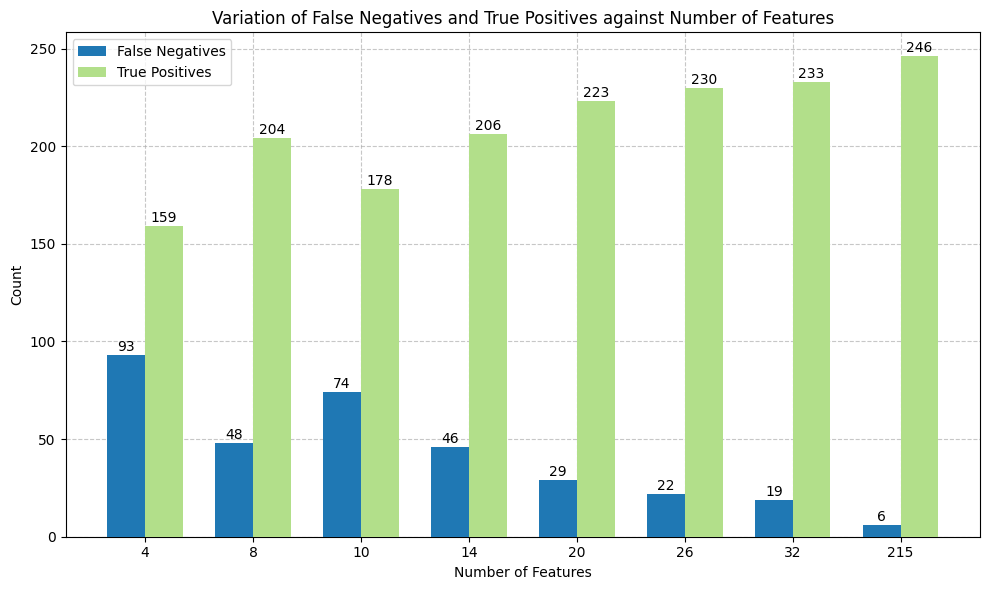

In [17]:

confusion_matrices = [cm_4, cm_8, cm_10, cm_14, cm_20, cm_26, cm_32, cm_215]

false_negatives = []
true_positives = []
num_features = [4, 8, 10, 14, 20, 26, 32, 215]

for cm in confusion_matrices:
    FN = cm[1, 0] 
    TP = cm[1, 1] 
    false_negatives.append(FN)
    true_positives.append(TP)

bar_width = 0.35 
index = np.arange(len(num_features))

cmap = plt.get_cmap('Paired') 

plt.figure(figsize=(10, 6))

bar1 = plt.bar(index, false_negatives, bar_width, label='False Negatives', color=cmap(1), zorder=3)
bar2 = plt.bar(index + bar_width, true_positives, bar_width, label='True Positives', color=cmap(2), zorder=3)

for i, rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 0.5, str(height), ha='center', va='bottom', fontsize=10, zorder=4)

for i, rect in enumerate(bar2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 0.5, str(height), ha='center', va='bottom', fontsize=10, zorder=4)

plt.xlabel('Number of Features')
plt.ylabel('Count')
plt.title('Variation of False Negatives and True Positives against Number of Features')
plt.xticks(index + bar_width / 2, num_features) 
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7, zorder=0)

plt.tight_layout()
plt.show()


#### Variation of number of true positives, true negatives, false positives and false negatives

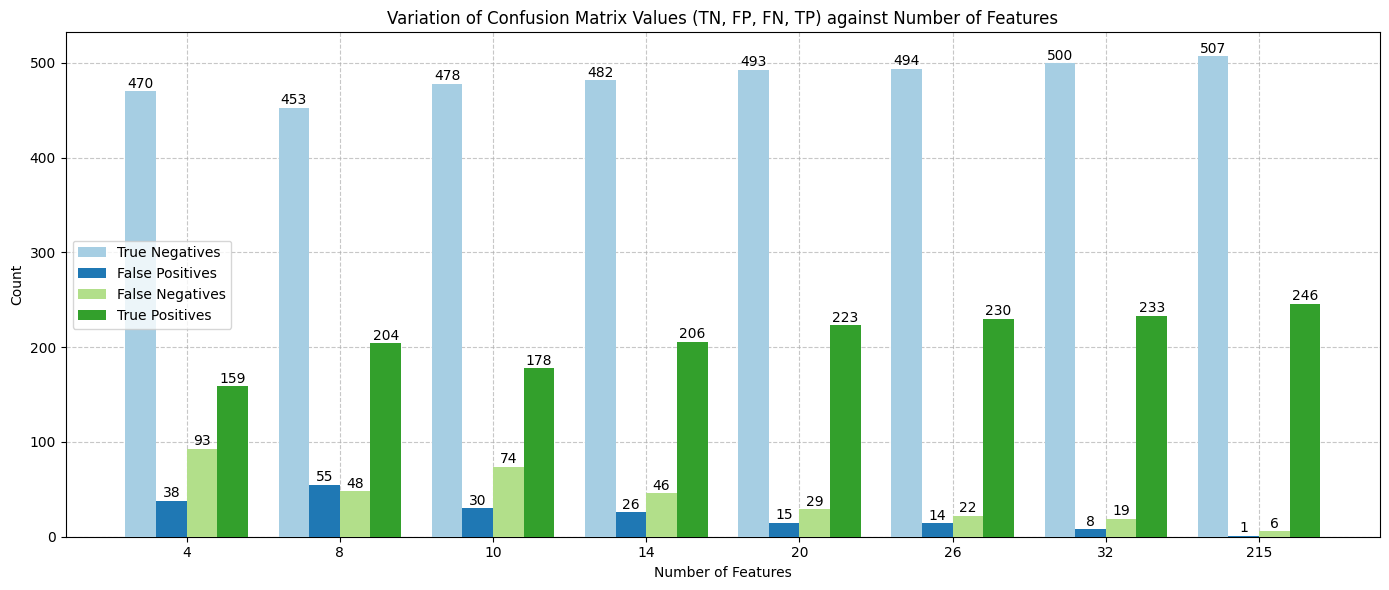

In [18]:
confusion_matrices = [cm_4, cm_8, cm_10, cm_14, cm_20, cm_26, cm_32, cm_215]

true_negatives = []
false_positives = []
false_negatives = []
true_positives = []
num_features = [4, 8, 10, 14, 20, 26, 32, 215]

for cm in confusion_matrices:
    TN = cm[0, 0]  
    FP = cm[0, 1] 
    FN = cm[1, 0]  
    TP = cm[1, 1]  
    true_negatives.append(TN)
    false_positives.append(FP)
    false_negatives.append(FN)
    true_positives.append(TP)

bar_width = 0.2  
index = np.arange(len(num_features)) 

cmap = plt.get_cmap('Paired')

plt.figure(figsize=(14, 6))

bar1 = plt.bar(index - 1.5 * bar_width, true_negatives, bar_width, label='True Negatives', color=cmap(0), zorder=3)
bar2 = plt.bar(index - 0.5 * bar_width, false_positives, bar_width, label='False Positives', color=cmap(1), zorder=3)
bar3 = plt.bar(index + 0.5 * bar_width, false_negatives, bar_width, label='False Negatives', color=cmap(2), zorder=3)
bar4 = plt.bar(index + 1.5 * bar_width, true_positives, bar_width, label='True Positives', color=cmap(3), zorder=3)

for i, rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 0.5, str(height), ha='center', va='bottom', fontsize=10, zorder=4)

for i, rect in enumerate(bar2):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 0.5, str(height), ha='center', va='bottom', fontsize=10, zorder=4)

for i, rect in enumerate(bar3):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 0.5, str(height), ha='center', va='bottom', fontsize=10, zorder=4)

for i, rect in enumerate(bar4):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 0.5, str(height), ha='center', va='bottom', fontsize=10, zorder=4)

plt.xlabel('Number of Features')
plt.ylabel('Count')
plt.title('Variation of Confusion Matrix Values (TN, FP, FN, TP) against Number of Features')
plt.xticks(index, num_features)  
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7, zorder=0)

plt.tight_layout()
plt.show()


# Effect of features in classififcations for model with 32 features

## Heatmap for 32 features

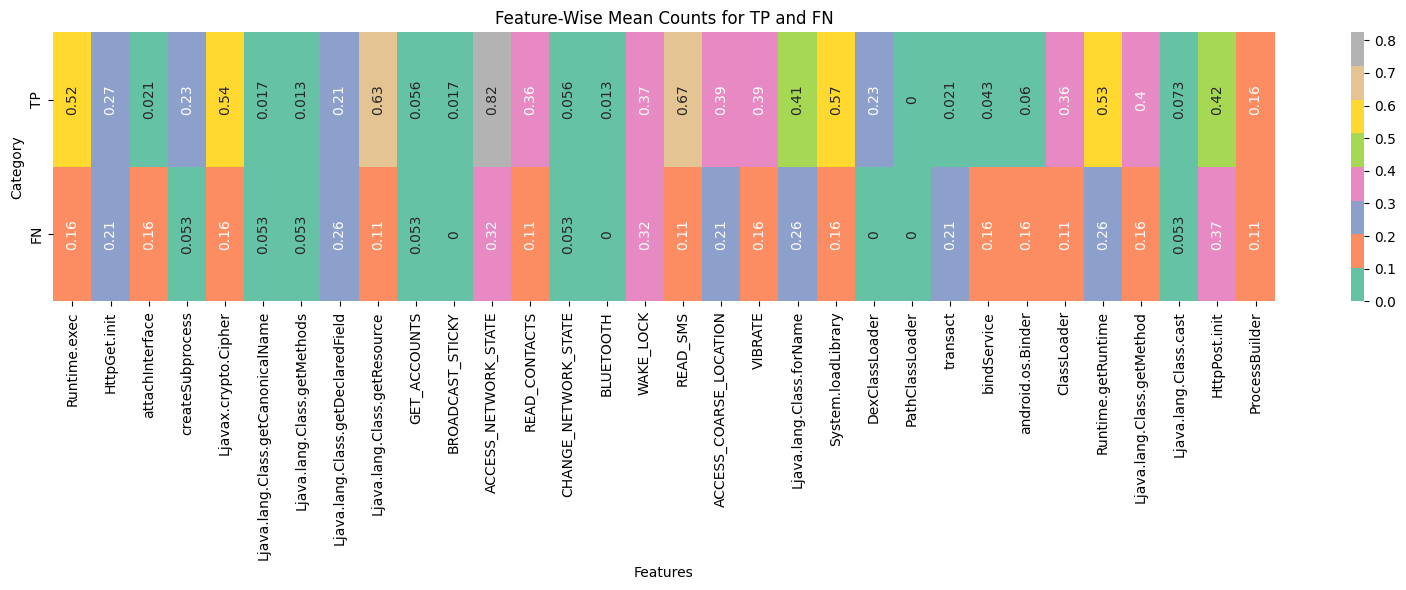

In [19]:
TP_mask = (y_test_32 == 1) & (y_pred_32 == 1)
FN_mask = (y_test_32 == 1) & (y_pred_32 == 0)

tp_mean_counts = (X_test_32[TP_mask] == 1).mean(axis=0)
fn_mean_counts = (X_test_32[FN_mask] == 1).mean(axis=0)

data = np.vstack([tp_mean_counts, fn_mean_counts])
heatmap_data = pd.DataFrame(data, index=["TP", "FN"], columns=X_test_32.columns)

plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_data, annot=True, cmap="Set2", cbar=True, annot_kws={"rotation": 90, "ha": "center"})
plt.title("Feature-Wise Mean Counts for TP and FN")
plt.xlabel("Features")
plt.ylabel("Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Plot of most Distinctive features

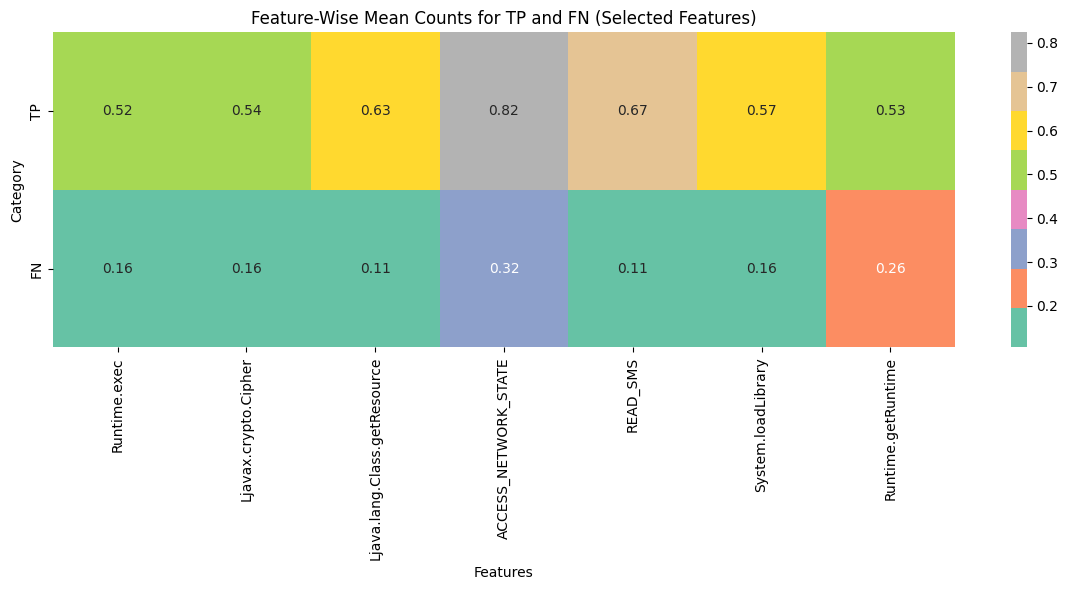

In [20]:
selected_features = ['Runtime.exec', 'Ljavax.crypto.Cipher', 'Ljava.lang.Class.getResource', 
                     'ACCESS_NETWORK_STATE', 'READ_SMS', 'System.loadLibrary', 'Runtime.getRuntime']

X_test_selected = X_test_32[selected_features]

TP_mask = (y_test_32 == 1) & (y_pred_32 == 1)
FN_mask = (y_test_32 == 1) & (y_pred_32 == 0)

tp_mean_counts = (X_test_selected[TP_mask] == 1).mean(axis=0)
fn_mean_counts = (X_test_selected[FN_mask] == 1).mean(axis=0)

data = np.vstack([tp_mean_counts, fn_mean_counts])
heatmap_data = pd.DataFrame(data, index=["TP", "FN"], columns=X_test_selected.columns)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap="Set2", cbar=True, annot_kws={"ha": "center"})
plt.title("Feature-Wise Mean Counts for TP and FN (Selected Features)")
plt.xlabel("Features")
plt.ylabel("Category")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## PLot of feature distribution of most distinctive features in TP, FP, FN and FP

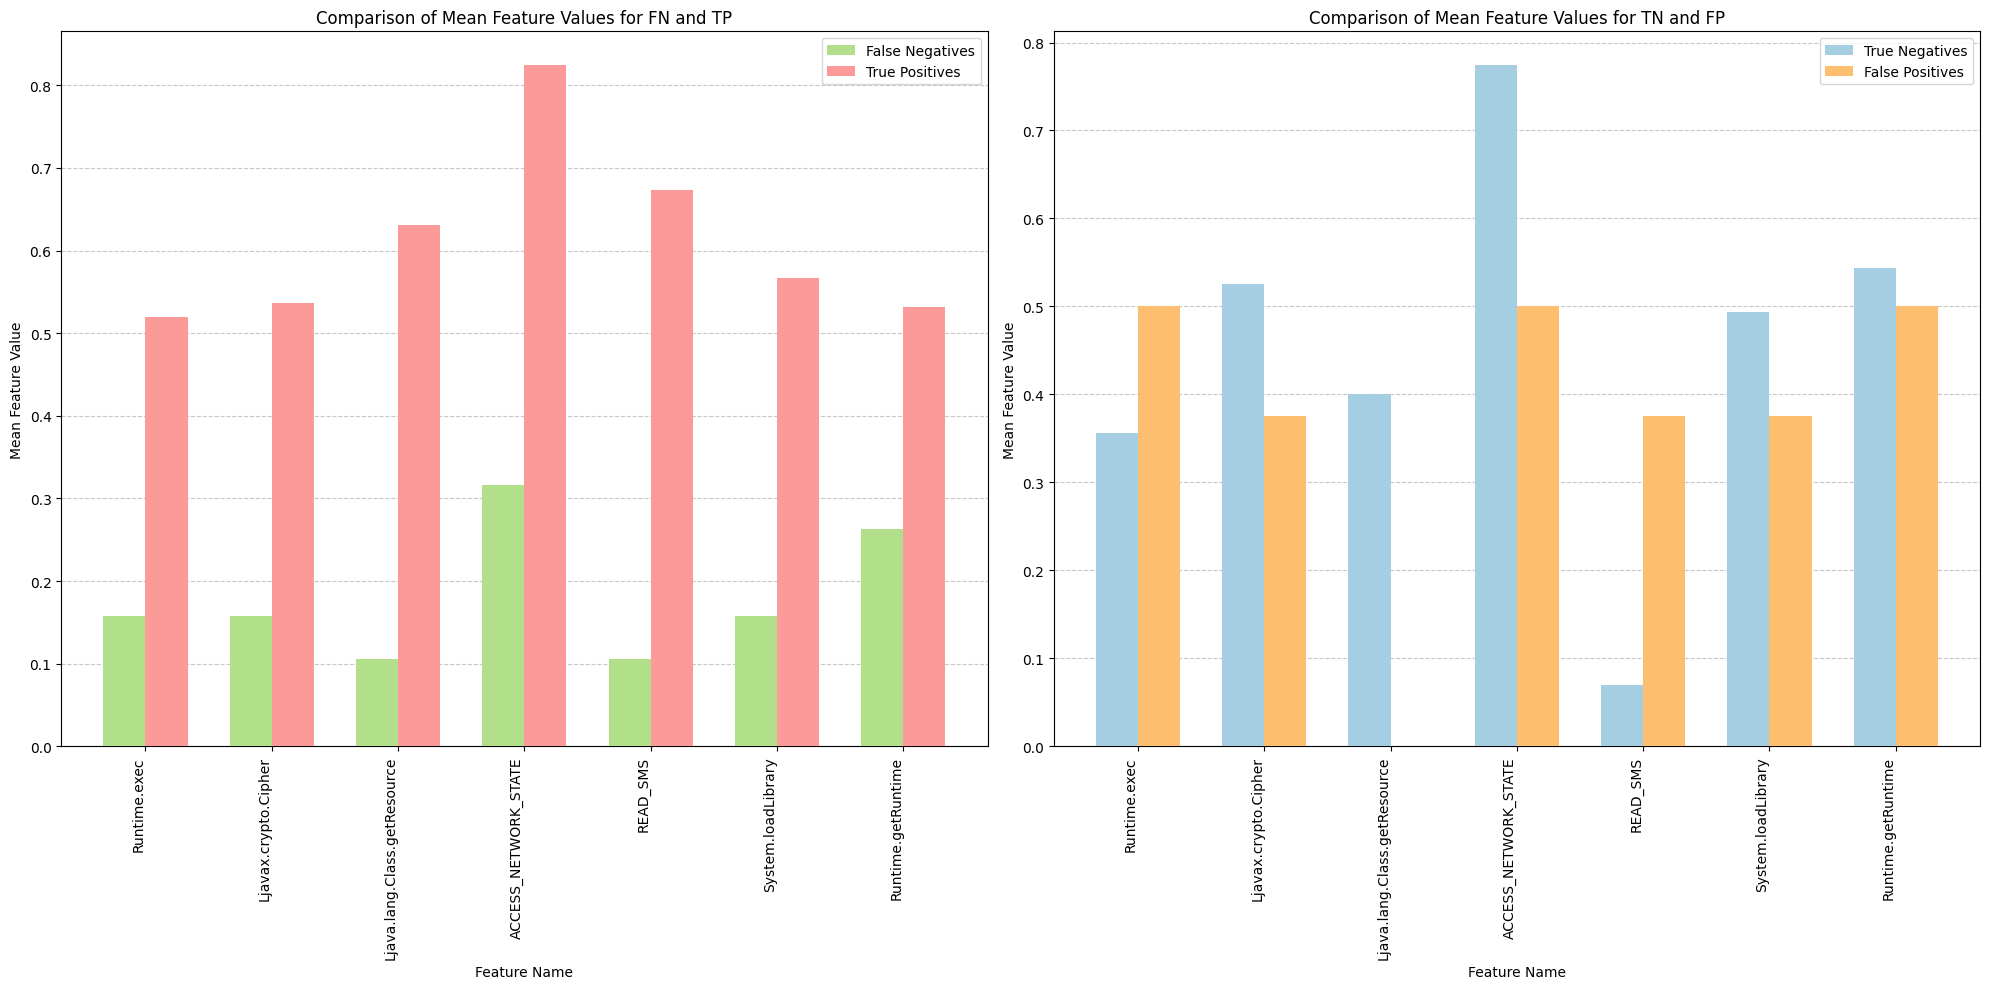

In [21]:
selected_features = ['Runtime.exec', 'Ljavax.crypto.Cipher', 'Ljava.lang.Class.getResource', 
                     'ACCESS_NETWORK_STATE', 'READ_SMS', 'System.loadLibrary', 'Runtime.getRuntime']


X_test_selected = X_test_32[selected_features]

TP_mask = (y_test_32 == 1) & (y_pred_32 == 1)
FN_mask = (y_test_32 == 1) & (y_pred_32 == 0)
TN_mask = (y_test_32 == 0) & (y_pred_32 == 0)
FP_mask = (y_test_32 == 0) & (y_pred_32 == 1)

X_FN = X_test_selected[FN_mask]  
X_TP = X_test_selected[TP_mask] 
X_TN = X_test_selected[TN_mask]  
X_FP = X_test_selected[FP_mask]  

mean_FN = np.mean(X_FN, axis=0)
mean_TP = np.mean(X_TP, axis=0)
mean_TN = np.mean(X_TN, axis=0)
mean_FP = np.mean(X_FP, axis=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))  

cmap = plt.get_cmap('Paired') 
bar_width = 0.5 
index = np.arange(len(mean_FN)) * 1.5  

bars_FN = ax1.bar(index - bar_width/2, mean_FN, bar_width, label='False Negatives', color=cmap(2), zorder=3)
bars_TP = ax1.bar(index + bar_width/2, mean_TP, bar_width, label='True Positives', color=cmap(4), zorder=3)
ax1.set_xlabel('Feature Name')
ax1.set_ylabel('Mean Feature Value')
ax1.set_title('Comparison of Mean Feature Values for FN and TP')
ax1.grid(True, axis='y', linestyle='--', alpha=0.7, zorder=0)
ax1.set_xticks(index)
ax1.set_xticklabels(selected_features, rotation=90, ha='right')
ax1.legend(loc='upper right')

bars_TN = ax2.bar(index - bar_width/2, mean_TN, bar_width, label='True Negatives', color=cmap(0), zorder=3)
bars_FP = ax2.bar(index + bar_width/2, mean_FP, bar_width, label='False Positives', color=cmap(6), zorder=3)
ax2.set_xlabel('Feature Name')
ax2.set_ylabel('Mean Feature Value')
ax2.set_title('Comparison of Mean Feature Values for TN and FP')
ax2.grid(True, axis='y', linestyle='--', alpha=0.7, zorder=0)
ax2.set_xticks(index)
ax2.set_xticklabels(selected_features, rotation=90, ha='right')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


## Testing using collected samples

In [28]:
#Fit model with 32 features
clf = RandomForestClassifier(random_state=2024)

clf.fit(X[FeatureSet_32], y)

RandomForestClassifier(random_state=2024)

In [29]:
# Load test dataset

test_dataset_path = "../Data/Test_Dataset_2.xlsx"
test_data = pd.read_excel(test_dataset_path, usecols=range(34))

test_data["class"] = test_data["Class"].astype(int)

X_test_created = test_data.iloc[:, 1:-2]
y_test_created = test_data.iloc[:, -1]

X_test_created = X_test_created.reindex(columns=X[FeatureSet_32].keys())

In [30]:
test_data.iloc[:, 1:-2].keys()

Index(['GET_ACCOUNTS', 'BROADCAST_STICKY', 'ACCESS_NETWORK_STATE',
       'READ_CONTACTS', 'CHANGE_NETWORK_STATE', 'BLUETOOTH', 'WAKE_LOCK',
       'READ_SMS', 'ACCESS_COARSE_LOCATION', 'VIBRATE', 'Runtime.exec',
       'HttpGet.init', 'attachInterface', 'createSubprocess',
       'Ljavax.crypto.Cipher', 'Ljava.lang.Class.getCanonicalName',
       'Ljava.lang.Class.getMethods', 'Ljava.lang.Class.getDeclaredField',
       'Ljava.lang.Class.getResource', 'Ljava.lang.Class.forName',
       'System.loadLibrary', 'DexClassLoader', 'PathClassLoader', 'transact',
       'bindService', 'android.os.Binder', 'ClassLoader', 'Runtime.getRuntime',
       'Ljava.lang.Class.getMethod', 'Ljava.lang.Class.cast', 'HttpPost.init',
       'ProcessBuilder'],
      dtype='object')

In [31]:
print(test_data.shape)
print(X_test_created.shape)
print(y_test_created.shape)

(2, 35)
(2, 32)
(2,)


In [ ]:
y_pred_test = clf.predict(X_test_created)

In [33]:
for i, prediction in enumerate(y_pred_test):
    if prediction == 1:
        print(f"Sample {i} is DCL Malware.")
    else:
        print(f"Sample {i} is not DCL Malware.")


Sample 0 is not DCL Malware.
Sample 1 is DCL Malware.
